In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(image,cmap="gray"):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(image,cmap='gray')

In [3]:
urun = cv2.imread('media/kahvaltilik.jpg',0)

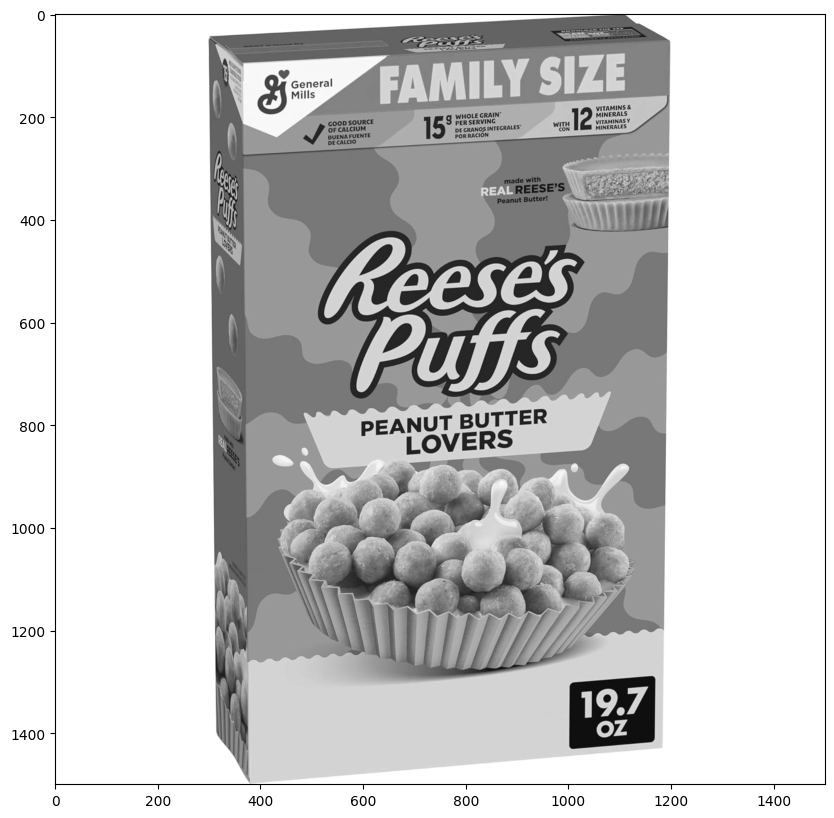

In [4]:
display(urun)

In [7]:
raf = cv2.imread('media/raf.png',0)

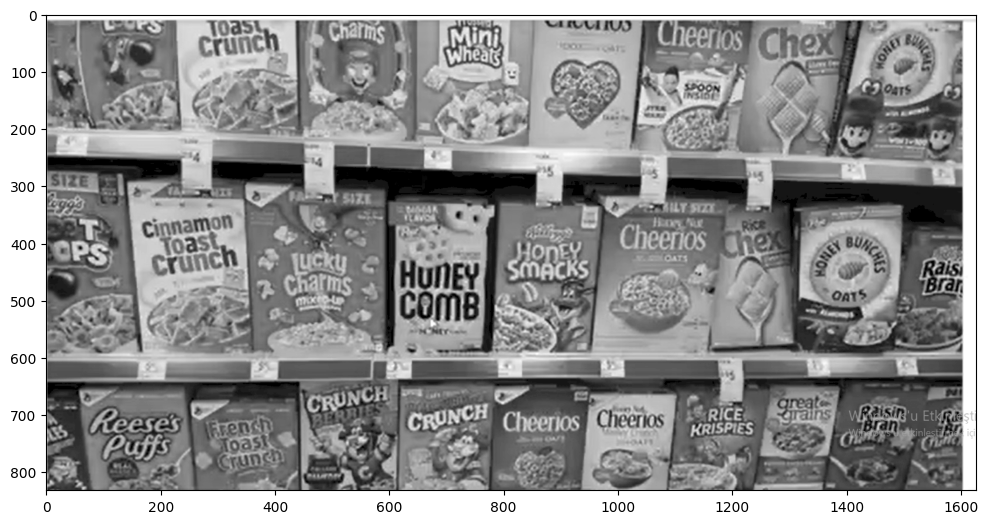

In [8]:
display(raf)

### Brute Force Detection with ORB Descriptors


In [9]:
orb = cv2.ORB.create() 

In [10]:
kp1 , dest1 =orb.detectAndCompute(urun,None) #burda urunun keypoints ve descriptorslerini buluyoruz
kp2 , dest2 =orb.detectAndCompute(raf,None)


In [11]:
bf=cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True) #burda iki resim arasında eşleşmeleri bulmak için bfmatcher kullanıyoruz
matches = bf.match(dest1,dest2) #burda iki resim arasında eşleşmeleri buluyoruz



In [12]:
matches = sorted(matches,key=lambda x:x.distance) #burda eşleşmeleri uzakliga gore sıralıyoruz

In [13]:
cizdirme= cv2.drawMatches(urun,kp1,raf,kp2,matches[:25],None,flags=2)

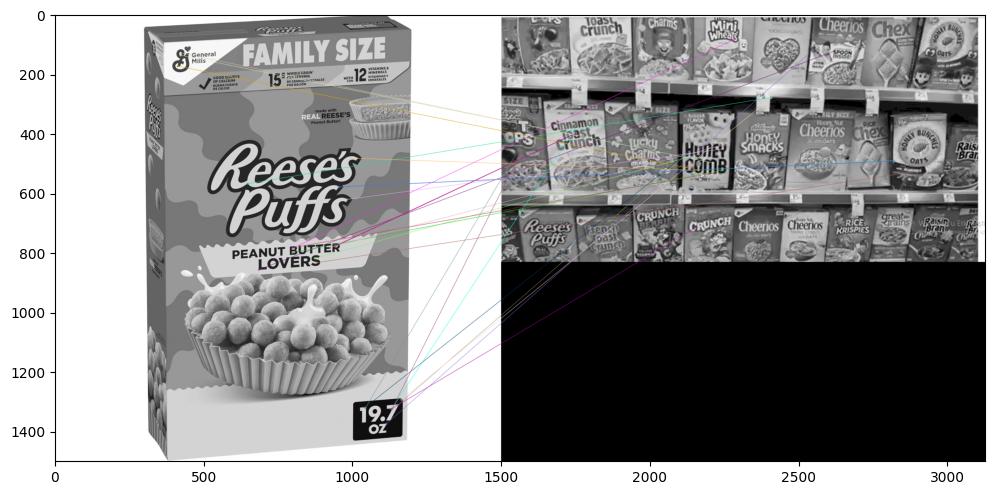

In [14]:
display(cizdirme) #cok basarili bir sonuc alamadik

### Brute Force Matching ile SIFT Descriptors ve Ratio Test

In [15]:
sift = cv2.xfeatures2d.SIFT_create() #sift algoritmasını kullanıyoruz

In [16]:
kp1,dest1 =sift.detectAndCompute(urun,None) #sift ile keypoints ve descriptorsleri buluyoruz
kp2,dest2 =sift.detectAndCompute(raf,None) #sift ile keypoints ve descriptorsleri buluyoruz

In [17]:
bf = cv2.BFMatcher() #bfmatcher kullanıyoruz
#en iyi iki olasilikli eslesmeleri buluyoruz
matches=bf.knnMatch(dest1,dest2,k=2) #iki resim arasında eşleşmeleri buluyoruz


In [18]:
matches

((< cv2.DMatch 000001E086F5BD30>, < cv2.DMatch 000001E086F5B2F0>),
 (< cv2.DMatch 000001E086F5BF10>, < cv2.DMatch 000001E086F5BC70>),
 (< cv2.DMatch 000001E086F5BBF0>, < cv2.DMatch 000001E086F5A5F0>),
 (< cv2.DMatch 000001E086FC1B50>, < cv2.DMatch 000001E086FC1F30>),
 (< cv2.DMatch 000001E086FC25F0>, < cv2.DMatch 000001E086FC2710>),
 (< cv2.DMatch 000001E086FC1F50>, < cv2.DMatch 000001E086FC15D0>),
 (< cv2.DMatch 000001E086FC3CF0>, < cv2.DMatch 000001E086FC2750>),
 (< cv2.DMatch 000001E086FC1C70>, < cv2.DMatch 000001E086FC2070>),
 (< cv2.DMatch 000001E086FC3DD0>, < cv2.DMatch 000001E086FC3CB0>),
 (< cv2.DMatch 000001E086FC2250>, < cv2.DMatch 000001E086FC3C90>),
 (< cv2.DMatch 000001E086FC3D50>, < cv2.DMatch 000001E086FC2410>),
 (< cv2.DMatch 000001E086FC3F90>, < cv2.DMatch 000001E086FC3C10>),
 (< cv2.DMatch 000001E086FC2650>, < cv2.DMatch 000001E086FC3C50>),
 (< cv2.DMatch 000001E086FC1FD0>, < cv2.DMatch 000001E086FC1510>),
 (< cv2.DMatch 000001E086FC3E70>, < cv2.DMatch 000001E086FC3F3

In [19]:
type(matches)

tuple

In [21]:
good = []

for match1 , match2 in matches: #burda iki resim arasında eşleşmeleri buluyoruz ve iyi olanları alıyoruz
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

In [22]:
cizdirme2 = cv2.drawMatchesKnn(urun,kp1,raf,kp2,good,None,flags=2)

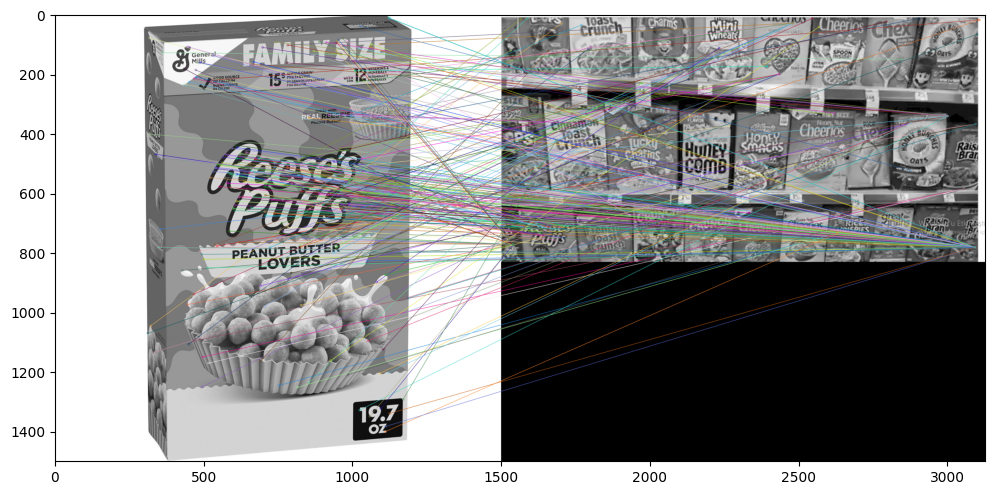

In [23]:
display(cizdirme2) #cok daha basarili bir sonuc alabildik

### FLANN Based Matcher

In [24]:
sift = cv2.xfeatures2d.SIFT_create() #sift algoritmasını kullanıyoruz

In [25]:
kp1,dest1 =sift.detectAndCompute(urun,None) #sift ile keypoints ve descriptorsleri buluyoruz
kp2,dest2 =sift.detectAndCompute(raf,None) #sift ile keypoints ve descriptorsleri buluyoruz

In [26]:
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)

In [29]:
flann =cv2.FlannBasedMatcher(index_params,search_params)

In [30]:
matches = flann.knnMatch(dest1,dest2,k=2)

In [31]:
matches

((< cv2.DMatch 000001E086FC33D0>, < cv2.DMatch 000001E086FC3530>),
 (< cv2.DMatch 000001E086FC39F0>, < cv2.DMatch 000001E086FC3330>),
 (< cv2.DMatch 000001E086FC2D90>, < cv2.DMatch 000001E086FC3270>),
 (< cv2.DMatch 000001E086FC3890>, < cv2.DMatch 000001E086FC2BD0>),
 (< cv2.DMatch 000001E086FC37D0>, < cv2.DMatch 000001E086FC3A30>),
 (< cv2.DMatch 000001E086FC29F0>, < cv2.DMatch 000001E086FC3650>),
 (< cv2.DMatch 000001E086FC2D70>, < cv2.DMatch 000001E086FC35B0>),
 (< cv2.DMatch 000001E086FC3730>, < cv2.DMatch 000001E086FC2C10>),
 (< cv2.DMatch 000001E086FC2F90>, < cv2.DMatch 000001E086FC30D0>),
 (< cv2.DMatch 000001E086FC2F70>, < cv2.DMatch 000001E086FC2970>),
 (< cv2.DMatch 000001E086FC2930>, < cv2.DMatch 000001E086FC33F0>),
 (< cv2.DMatch 000001E086FC24F0>, < cv2.DMatch 000001E087136E30>),
 (< cv2.DMatch 000001E087136350>, < cv2.DMatch 000001E087136810>),
 (< cv2.DMatch 000001E087137610>, < cv2.DMatch 000001E087137410>),
 (< cv2.DMatch 000001E087137530>, < cv2.DMatch 000001E087136F1

In [32]:
good= []

In [33]:
for i ,(match1,match2) in enumerate(matches): #burda iki resim arasında eşleşmeleri buluyoruz ve iyi olanları alıyoruz
    if match1.distance < 0.7*match2.distance: 
        good.append([match1]) 

cizdirme3 = cv2.drawMatchesKnn(urun,kp1,raf,kp2,good,None,flags=2)

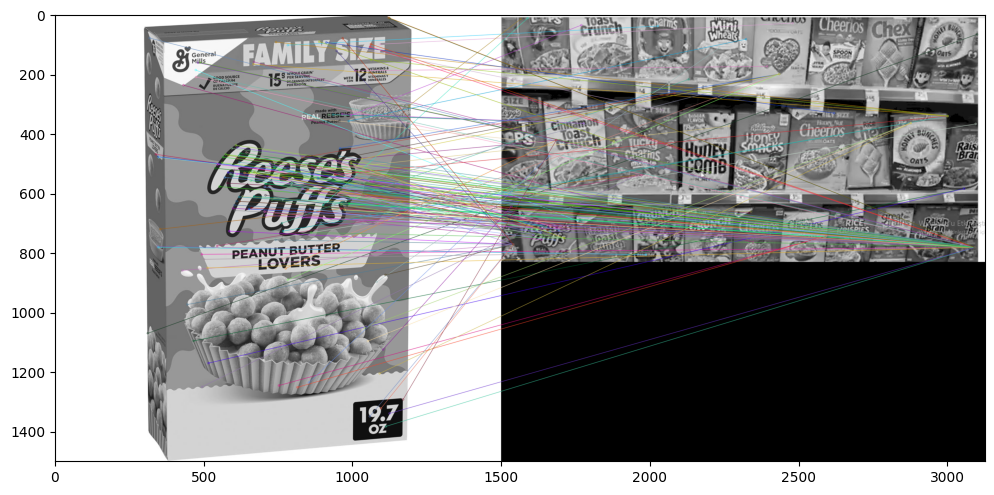

In [34]:
display(cizdirme3)